# Breast Cancer Prediction With KNN And Random Forest


### Intro

Our goal is to classify if a lump found in the breast, could be malignant in which case it is cancerous or if its benign, in with case it is non-cancerous by looking at datapoints


The following features have been provided in the dataset, we can see things like the thickness of cellclumps, uniformity, texture, etc. and Class is the label. benign (0) or malicious (1)


**DATA**
* **clump_thickness**: (1-10).
* **cell_size_uniformity**: (1-10).
* **cell_shape_uniformity**: (1-10). 
* **marginal_adhesion**: (1-10).
* **single_epithelial_cell_size**: (1-10)
* **bare_nuclei**(1-10)
* **bland_chromatin**(1-10)
* **normal_nucleoli**: (1-10). 
* **mitoses**: (1-10).
* **Class**: (0 or 1).





In [1]:
#data
import pandas as pd
import numpy as np

#math
import matplotlib as mpl
import matplotlib.pyplot as plt

#visualisation
import seaborn as sns
%matplotlib inline




In [2]:
df = pd.read_csv("../dataset/breast-cancer1.csv")
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [3]:
df = df.drop(['Sample code number'], axis=1)

In [4]:
# Check if data contains Null values 
df.isnull().sum()


Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

It does not...

In [5]:
for i in  range(0, len(df)):
    if df['Class'][i]== 2:
        df['Class'][i]=0
    else:
        df['Class'][i]=1
# And for readability change the label. 

df['Cancerous']=df.Class

df = df.drop(['Class'],axis=1)

In [6]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Cancerous
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1


First lets plot some of the data to see if we can find some correlation between the data or any outliers.


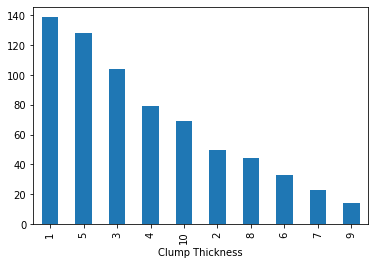

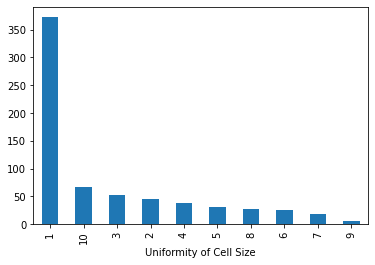

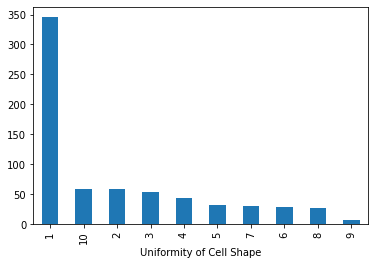

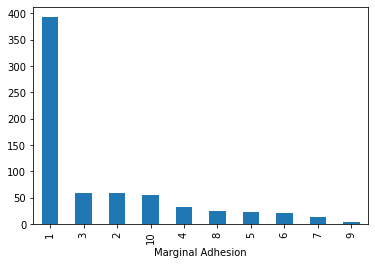

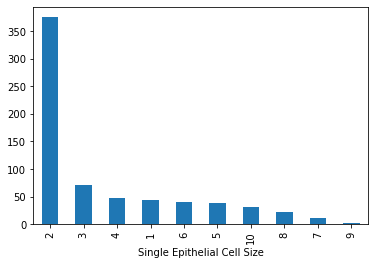

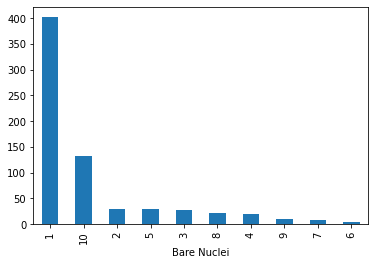

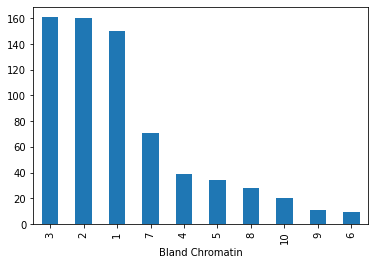

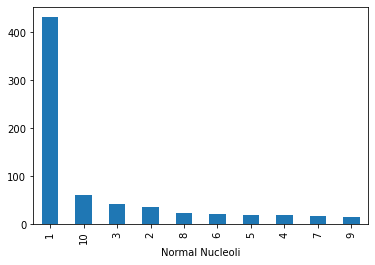

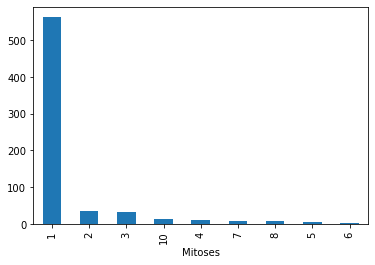

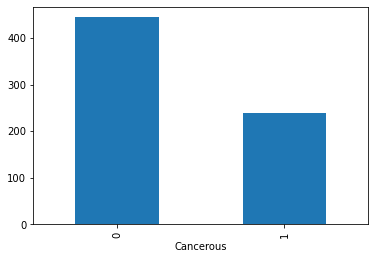

In [7]:
# Barchart for each of the columns
for i in df.columns:
    df[i].value_counts().plot.bar()
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

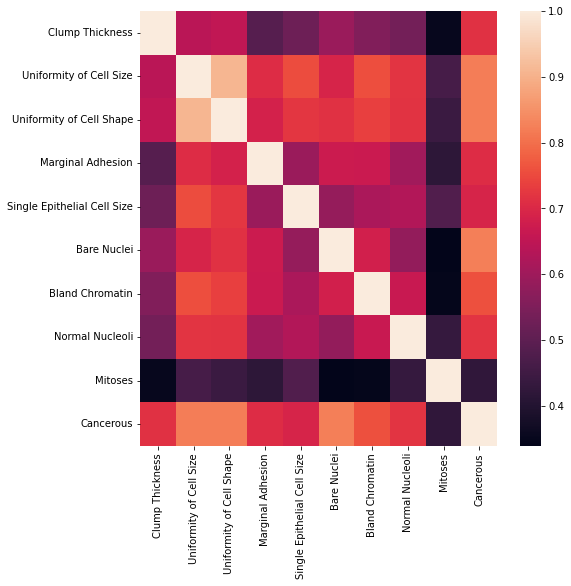

In [8]:
# Correlation matrix
df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

Preparing the data for classification 


In [9]:
y = df['Cancerous']
y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Cancerous, Length: 683, dtype: int64

In [10]:
X = df.drop(['Cancerous'], axis=1)
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


Scale features using statistics that are robust to outliers (RobustScaler).

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [11]:
from sklearn.preprocessing import RobustScaler

X = RobustScaler().fit_transform(X)
X

array([[ 0.25      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25      ,  0.75      ,  0.75      , ...,  0.        ,
         0.33333333,  0.        ],
       [-0.25      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25      ,  2.25      ,  2.25      , ...,  1.66666667,
         3.        ,  1.        ],
       [ 0.        ,  1.75      ,  1.25      , ...,  2.33333333,
         1.66666667,  0.        ],
       [ 0.        ,  1.75      ,  1.75      , ...,  2.33333333,
         1.        ,  0.        ]])

Since we have a relatively small dataset we can use k-fold cross validation to see how the model would perform on unseen data.


In [12]:
# Keep scores saved 

scores = []


###  Decision tree classifier

In [13]:
# imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [14]:
KFold = KFold(n_splits=9, random_state=420, shuffle=True)

In [15]:
decision_tree_classifier_cost = []

for train,test in KFold.split(X):
    # split data
    x_train=X[train]
    y_train=y[train]
    x_test=X[test]
    y_test=y[test]
    
    # create classifier and fit the data
    decision_tree_classifier = DecisionTreeClassifier(criterion='gini')
    decision_tree_classifier.fit(x_train,y_train)
    
    # print the score. 
    print(decision_tree_classifier.score(x_test,y_test))
    decision_tree_classifier_cost.append(decision_tree_classifier.score(x_test,y_test))

0.9210526315789473
0.9342105263157895
0.9342105263157895
0.9473684210526315
0.9078947368421053
0.9473684210526315
0.9473684210526315
0.9605263157894737
0.96


In [16]:
# Find the mean of Decision Tree scores. 

scores.append(np.array(decision_tree_classifier_cost).mean())

np.array(decision_tree_classifier_cost).mean()

0.9400000000000001

### Random Forest Classifier

In [17]:
# import classifier
from sklearn.ensemble import RandomForestClassifier


In [18]:
# define classifier
random_forest_classifier = RandomForestClassifier(n_estimators = 300, random_state = 420, criterion='gini')


In [19]:
random_forest_classifier_cost = []

for train,test in KFold.split(X):
    # split data
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    # create classifier
    random_forest_classifier.fit(x_train, y_train)
    
    # print the scores.
    print(random_forest_classifier.score(x_test, y_test))
    random_forest_classifier_cost.append(random_forest_classifier.score(x_test, y_test))

0.9605263157894737
0.9736842105263158
0.9605263157894737
0.9868421052631579
0.9605263157894737
0.9605263157894737
0.9736842105263158
0.9868421052631579
0.9733333333333334


Find the average score.

In [20]:
scores.append(np.array(random_forest_classifier_cost).mean())
np.array(random_forest_classifier_cost).mean()

0.9707212475633528

### Logistic regression 

In [21]:
# imports and Kfold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


In [22]:
KFold = KFold(n_splits=9, random_state = 420, shuffle = True)

In [23]:
logistic_regression_cost = []

for train, test in KFold.split(X):
    # Split the data
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    # Create model    
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_train, y_train)
    
    # Print scores
    print(logistic_regression_model.score(x_test, y_test))
    logistic_regression_cost.append(logistic_regression_model.score(x_test, y_test))

0.9605263157894737
0.9736842105263158
0.9210526315789473
0.9736842105263158
0.9605263157894737
0.9605263157894737
0.9868421052631579
0.9736842105263158
0.9733333333333334


In [24]:
scores.append(np.array(logistic_regression_cost).mean())

np.array(logistic_regression_cost).mean()

0.9648732943469785

### Naive Bayes

In [25]:
# Import library
from sklearn.naive_bayes import GaussianNB


Define the Naive bayes classifier

In [26]:
naive_bayes_classifier_cost = []

for train,test in KFold.split(X):
    # split data
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    # create classifier
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(x_train, y_train)
    
    # print the scores.
    print(naive_bayes_classifier.score(x_test, y_test))
    naive_bayes_classifier_cost.append(naive_bayes_classifier.score(x_test, y_test))

0.9605263157894737
0.9473684210526315
0.9605263157894737
0.9473684210526315
0.9736842105263158
0.9605263157894737
0.9736842105263158
0.9736842105263158
0.96


Find the average score

In [27]:
scores.append(np.array(naive_bayes_classifier_cost).mean())

np.array(naive_bayes_classifier_cost).mean()

0.9619298245614034

## Conclusion

/home/baz/miniconda3/envs/logboek/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Type')

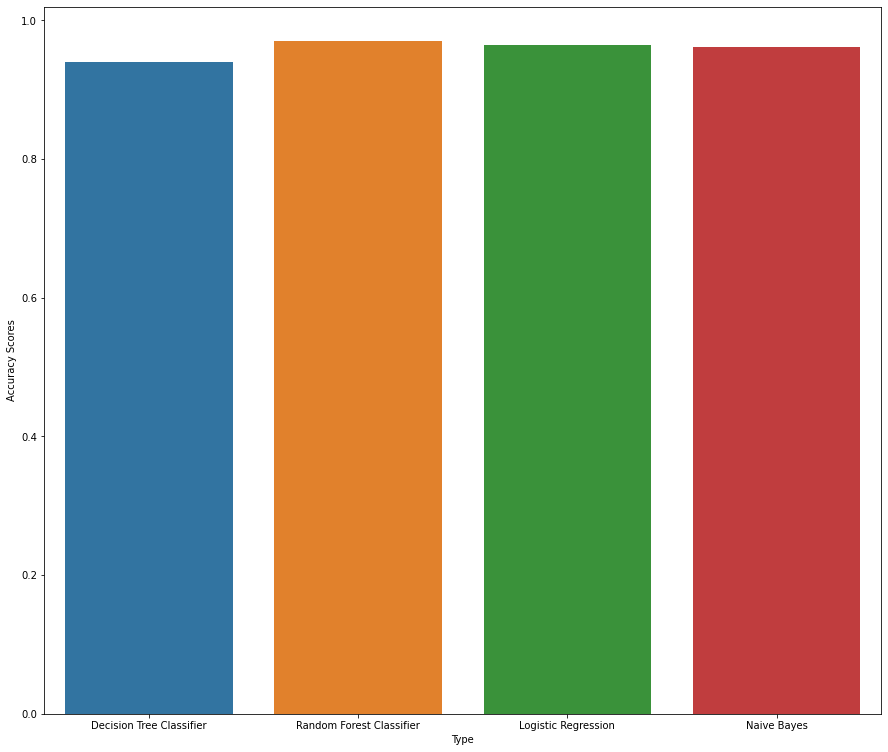

In [28]:
np.array(scores) * 100
score_names = ["Decision Tree Classifier", "Random Forest Classifier", "Logistic Regression", "Naive Bayes"]

plt.figure(figsize = (15, 13))
sns.barplot(score_names, scores)
plt.ylabel("Accuracy Scores")
plt.xlabel("Type")



We can see that the Random forest classifier was the best with K cross fold validation.